Dataset Preview:
              closing_price symbol
trading_date                      
2023-01-02      1504.967142   INFY
2023-01-03      1503.584499   INFY
2023-01-04      1510.061384   INFY
2023-01-05      1525.291682   INFY
2023-01-06      1522.950149   INFY


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0681 - val_loss: 0.0033
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - val_loss: 0.0168
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0081 - val_loss: 0.0044
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0056 - val_loss: 0.0044
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

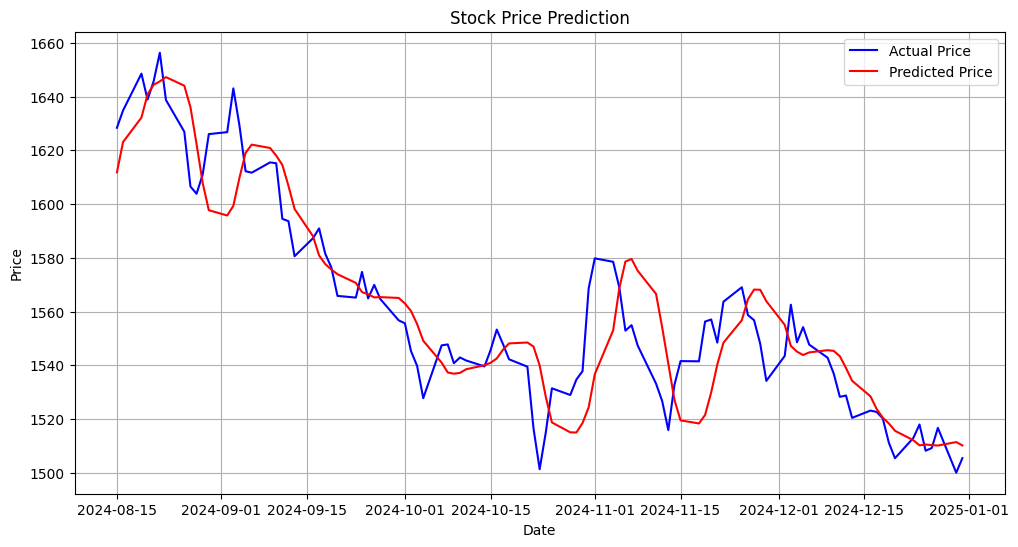

In [ ]:
# Phase 1: Stock Price Prediction using LSTM and GRU

# --- 0. Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# --- 1. Load Dataset ---
# If using Google Colab, upload the file via the Files tab
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stock_data.csv", parse_dates=['trading_date'], index_col='trading_date')
print("Dataset Preview:")
print(df.head())

# --- 2. Data Preprocessing ---
def preprocess_data(df):
    if 'closing_price' not in df.columns:
        raise ValueError("Dataset must contain 'closing_price' column")

    df = df.dropna()
    scaler = MinMaxScaler()
    df['scaled_price'] = scaler.fit_transform(df[['closing_price']])
    return df, scaler

# Create sequential data for time series
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

# --- 3. Build Model (LSTM or GRU) ---
def build_model(model_type='LSTM', seq_len=30, features=1):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True, input_shape=(seq_len, features)))
        model.add(LSTM(32))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=True, input_shape=(seq_len, features)))
        model.add(GRU(32))
    else:
        raise ValueError("Invalid model_type. Choose 'LSTM' or 'GRU'.")

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model

# --- 4. Evaluation ---
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")
    return mse, mae

# --- 5. Plot Results ---
def plot_results(actual, predicted, dates):
    plt.figure(figsize=(12,6))
    plt.plot(dates, actual, label='Actual Price', color='blue')
    plt.plot(dates, predicted, label='Predicted Price', color='red')
    plt.title("Stock Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 6. Main Execution ---
sequence_length = 30
df, scaler = preprocess_data(df)
data = df['scaled_price'].values
X, y = create_sequences(data, sequence_length)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM/GRU input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Choose model type: 'LSTM' or 'GRU'
model = build_model(model_type='LSTM', seq_len=sequence_length)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Predict
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation and Visualization
evaluate(actual_prices, predicted_prices)
plot_results(actual_prices, predicted_prices, df.index[-len(predicted_prices):])

In [3]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import gradio as gr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense  # or GRU
from tensorflow.keras.callbacks import EarlyStopping

# 2. Load and preprocess data
df = pd.read_csv('/content/stock_data.csv')
close_prices = df['closing_price'].values.reshape(-1, 1)  # Replace 'Close' with your column name

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

sequence_length = 30  # Or whatever your model uses

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_prices, sequence_length)

# 3. Split into train/test (simple split)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 4. Build and train the model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(sequence_length, 1)),  # or GRU
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

# 5. Define Gradio prediction function
def predict_next_price(prices):
    try:
        # Convert input to list of floats
        if isinstance(prices, list):
            prices = [float(p[0]) if isinstance(p, list) else float(p) for p in prices]
        else:
            return "Input must be a list."
        if len(prices) != sequence_length:
            return f"Please enter exactly {sequence_length} prices."
        input_scaled = scaler.transform(np.array(prices).reshape(-1, 1))
        X_input = input_scaled.reshape((1, sequence_length, 1))
        pred_scaled = model.predict(X_input)
        pred_price = scaler.inverse_transform(pred_scaled)
        return float(pred_price[0][0])
    except Exception as e:
        return f"Error: {e}"

# 6. Create Gradio interface
iface = gr.Interface(
    fn=predict_next_price,
    inputs=gr.Dataframe(
        headers=["Closing Price"],
        row_count=sequence_length,
        col_count=1,
        label=f"Enter the last {sequence_length} closing prices"
    ),
    outputs=gr.Number(label="Predicted Next Closing Price"),
    title="Stock Price Predictor (LSTM/GRU)",
    description=f"Input the last {sequence_length} closing prices to predict the next day's closing price."
)

# 7. Launch Gradio app
iface.launch(share=True)  # share=True gives a public link in Colab

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0957 - val_loss: 0.0093
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0039 - val_loss: 0.0053
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034 - val_loss: 0.0060
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0026 - val_loss: 0.0045
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032 - val_l